In [51]:
!pip install wandb


In [ ]:
#13b86763ab8ddf529c91c7dce385c6cb04b5253e

In [52]:
import wandb
wandb.login(key="13b86763ab8ddf529c91c7dce385c6cb04b5253e")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [54]:
from sklearn.model_selection import train_test_split

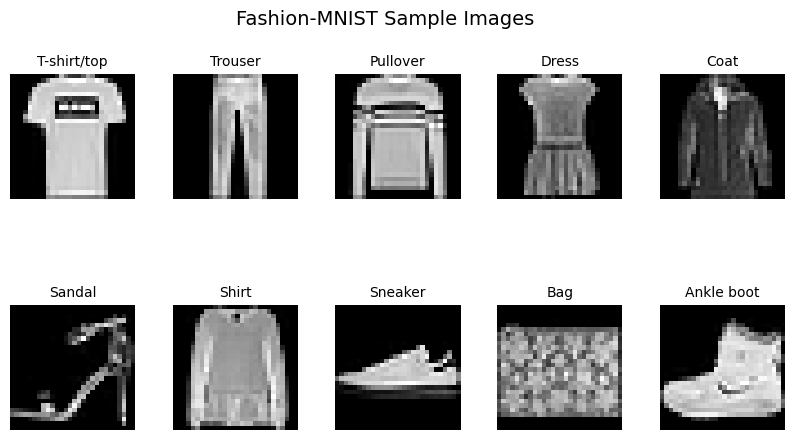

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
from keras.datasets import fashion_mnist

# Initialize wandb
wandb.init(project="DA6401-Assignment_1", name="alternative_sample_images")

# Load dataset
(x_train, y_train), (_, _) = fashion_mnist.load_data()

# Fashion-MNIST class labels
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Select 1 sample per class
sample_images = []
sample_labels = []
for class_id in range(10):
    idx = np.argwhere(y_train == class_id)[0][0]  # Alternative way to find first occurrence
    sample_images.append(x_train[idx])
    sample_labels.append(class_labels[class_id])

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Fashion-MNIST Sample Images", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i], cmap="gray")
    ax.set_title(sample_labels[i], fontsize=10)
    ax.axis("off")

plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust spacing

# Save the grid as an image
plt.savefig("fashion_mnist_sample_images.png", bbox_inches='tight', dpi=300)

# Log the entire grid to wandb
wandb.log({"Sample Images Grid": wandb.Image("fashion_mnist_sample_images.png")})

wandb.finish()


In [58]:
#Question no:3
import numpy as np
from keras.datasets import fashion_mnist

# Load dataset
(x, y), (x_test, y_test) = fashion_mnist.load_data()

# Flatten the input
x = x.reshape(x.shape[0], -1)  # (60000, 784)
x = x / 255.0  #normalize

# Sigmoid Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Softmax Activation
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

# Initialize Weights and Biases
def initialize_parameters(num_of_neurons_layers):
    weight = {}
    bias = {}
    for i in range(1, len(num_of_neurons_layers)):
        weight['W' + str(i)] = np.random.randn(num_of_neurons_layers[i], num_of_neurons_layers[i - 1]) * 0.01
        bias['b' + str(i)] = np.zeros((num_of_neurons_layers[i], 1))
    return weight, bias

# Forward Propagation
def forward_propagation(x, cl, num_hidden_layers, num_neurons):
    inp_dim = x.shape[1]
    num_of_neurons_layers = [inp_dim] + [num_neurons] * num_hidden_layers + [cl]
    l = len(num_of_neurons_layers)

    a = {}
    h = {'h0': x.T}
    weight, bias = initialize_parameters(num_of_neurons_layers)


    for i in range(1, l - 1):
        a["a" + str(i)] = np.dot(weight['W' + str(i)], h['h' + str(i - 1)]) + bias['b' + str(i)]
        h['h' + str(i)] = sigmoid(a["a" + str(i)])

    a['a' + str(l - 1)] = np.dot(weight['W' + str(l - 1)], h['h' + str(l - 2)]) + bias['b' + str(l - 1)]
    y_pred = softmax(a['a' + str(l - 1)])

    return y_pred


y_pred = forward_propagation(x, 10, 3, 36)
print(y_pred.shape)
print(y_pred[:, 0])


(10, 60000)
[0.1011692  0.10137898 0.0984214  0.09841568 0.10747424 0.09745203
 0.09607425 0.10315365 0.09684849 0.09961207]


In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

class FFNN:
    def __init__(self,x_train, y_train, x_test, y_test,num_hidden_layers=3, num_neurons=128,weight_init="xavier",act="sigmoid",l2_reg=0):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.num_hidden_layers=num_hidden_layers
        self.num_of_neurons_layers = [784] + [num_neurons] * num_hidden_layers + [len(np.unique(y_train))]
        self.act=act
        self.l2_reg=l2_reg
        self.weight_init=weight_init
        self.weights = {}
        self.bias = {}
        self.data_preprocessing()
        self.split_data()
        self.one_hot_encode()
        self.initialize_parameters()

    def data_preprocessing(self):
        self.x_train = self.x_train.reshape(self.x_train.shape[0], -1) / 255.0
        self.x_test = self.x_test.reshape(self.x_test.shape[0], -1) / 255.0

    def split_data(self):
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.x_train, self.y_train, test_size=0.1, random_state=42)

    def one_hot_encode(self):
      num_classes = len(np.unique(self.y_train))

      self.y_train_encoded = np.zeros((len(self.y_train), num_classes))
      self.y_train_encoded[np.arange(len(self.y_train)), self.y_train] = 1

      self.y_val_encoded = np.zeros((len(self.y_val), num_classes))
      self.y_val_encoded[np.arange(len(self.y_val)), self.y_val] = 1

      self.y_test_encoded = np.zeros((len(self.y_test), num_classes))
      self.y_test_encoded[np.arange(len(self.y_test)), self.y_test] = 1


    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def deriv_sigmoid(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def relu(self, z):
        return np.maximum(0, z)

    def deriv_relu(self, z):
        return np.where(z <= 0, 0, 1)

    def tanh(self, z):
        return np.tanh(z)

    def deriv_tanh(self, z):
        return 1 - np.tanh(z) ** 2

    def softmax(self, z):
        z = z - np.max(z, axis=0, keepdims=True)
        exp = np.exp(z)
        return exp / np.sum(exp, axis=0, keepdims=True)

    def activation_function(self, z):
        if self.act == 'sigmoid':
            return self.sigmoid(z)
        elif self.act == 'relu':
            return self.relu(z)
        elif self.act == 'tanh':
            return self.tanh(z)

    def grad_activation_function(self, z):
        if self.act == 'sigmoid':
            return self.deriv_sigmoid(z)
        elif self.act == 'relu':
            return self.deriv_relu(z)
        elif self.act == 'tanh':
            return self.deriv_tanh(z)

    def cross_entropy(self, y_actual, y_pred):
      epsilon = 1e-15  # to avoid log(0)
      y_pred = np.clip(y_pred, epsilon, 1 - epsilon)


      norm = sum(np.sum(np.square(weight)) for weight in self.weights.values())

      loss = -np.mean(np.sum(y_actual * np.log(y_pred), axis=0)) + self.l2_reg / 2 * norm
      return loss

    def mean_squared_error_loss(self, y_actual, y_pred):
      return np.mean(np.sum((y_actual - y_pred)**2, axis=0))

    def initialize_parameters(self):
      for i in range(1, len(self.num_of_neurons_layers)):
        if self.weight_init == "xavier":
            self.weights['W' + str(i)] = np.random.randn(self.num_of_neurons_layers[i], self.num_of_neurons_layers[i - 1]) * np.sqrt(2/ self.num_of_neurons_layers[i - 1])
        elif self.weight_init=="random":
            self.weights['W' + str(i)] = np.random.randn(self.num_of_neurons_layers[i], self.num_of_neurons_layers[i - 1])
        self.bias['b' + str(i)] = np.zeros((self.num_of_neurons_layers[i], 1))

    def forward_propagation(self, x):
        a = {}
        h = {'h0': x.T}
        l = len(self.num_of_neurons_layers)

        for i in range(1, l-1):
          W = self.weights["W"+str(i)]
          b = self.bias["b"+str(i)]
          a["a" + str(i)] = np.matmul(W, h["h" + str(i-1)]) + b
          h['h' + str(i)] = self.activation_function(a["a" + str(i)])

        # output layer
        W = self.weights["W"+str(l-1)]
        b = self.bias["b"+str(l-1)]

        a["a"+str(l-1)] = np.matmul(W,h["h"+str(l-2)]) + b

        y_pred= self.softmax(a["a"+str(l-1)])
        return a,h,y_pred

    def back_propagation(self, x, y_actual):
        a, h, y_pred = self.forward_propagation(x)
        grads = {}
        l = len(self.num_of_neurons_layers)
        grad_a = {'a' + str(l - 1): y_pred - y_actual.T}

        for i in range(l - 1, 0, -1):
          grads['gradW' + str(i)] = np.dot(grad_a['a' + str(i)], h['h' + str(i - 1)].T) / x.shape[0]+self.l2_reg*self.weights["W"+str(i)]
          grads['gradb' + str(i)] = np.sum(grad_a['a' + str(i)], axis=1, keepdims=True) / x.shape[0]
          if i>1:
            grad_a['h' + str(i - 1)] = np.dot(self.weights['W' + str(i)].T, grad_a['a' + str(i)])
            grad_a['a' + str(i - 1)] = grad_a['h' + str(i - 1)] * (self.grad_activation_function(a['a' + str(i - 1)]))

        return grads

    def cal_accuracy(self, x):
      if np.array_equal(x, self.x_train):
        _, _, y_train_pred = self.forward_propagation(self.x_train)
        y_train_pred = np.clip(y_train_pred, 1e-15, 1 - 1e-15)

        loss = self.cross_entropy(self.y_train_encoded.T, y_train_pred)

        actual_label = np.argmax(self.y_train_encoded.T, axis=0)
        predicted_label = np.argmax(y_train_pred, axis=0)
        accuracy = np.mean(actual_label == predicted_label)

        return loss, accuracy, y_train_pred

      elif np.array_equal(x, self.x_val):
        _, _, y_val_pred = self.forward_propagation(self.x_val)
        y_val_pred = np.clip(y_val_pred, 1e-15, 1 - 1e-15)

        loss = self.cross_entropy(self.y_val_encoded.T, y_val_pred)

        actual_label = np.argmax(self.y_val_encoded.T, axis=0)
        predicted_label = np.argmax(y_val_pred, axis=0)
        accuracy = np.mean(actual_label == predicted_label)

        return loss, accuracy, y_val_pred


    def cal_test_accuracy(self,x):
        _, _, y_test_pred = self.forward_propagation(self.x_test)
        y_test_pred = np.clip(y_test_pred, 1e-15, 1 - 1e-15)
        loss=self.cross_entropy(self.y_test_encoded.T,y_test_pred)

        actual_label=np.argmax(self.y_test_encoded.T, axis=0)
        predicted_label=np.argmax(y_test_pred, axis =0)
        accuracy=np.mean(actual_label==predicted_label)
        return loss,accuracy,y_test_pred


    def gradient_descent(self, eta, x, y_actual, epochs):
      for epoch in range(epochs):
        grads = self.back_propagation(x, y_actual)
        for i in range(1, len(self.num_of_neurons_layers)):
            self.weights['W' + str(i)] -= eta * grads['gradW' + str(i)]
            self.bias['b' + str(i)] -= eta * grads['gradb' + str(i)]

        loss, accuracy,_ = self.cal_accuracy(self.x_train)
        print(f"End of Epoch {epoch+1}, Loss: {loss}, Accuracy: {accuracy}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': accuracy*100 })
        wandb.log({'epoch': epoch + 1})

        val_loss, val_accuracy,_ = self.cal_accuracy(self.x_val)
        print(f"End of Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
        wandb.log({'val_loss': val_loss})
        wandb.log({'validation_accuracy': val_accuracy*100 })
      parameters = {**self.weights, **self.bias}
      return parameters

    def sgd(self, eta, batch_size, epochs):
      for epoch in range(epochs):
        indices = np.random.permutation(self.x_train.shape[0])
        x_shuffled = self.x_train[indices]
        y_shuffled = self.y_train_encoded[indices]

        for i in range(0, self.x_train.shape[0], batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            grads = self.back_propagation(x_batch, y_batch)

            for j in range(1, len(self.num_of_neurons_layers)):
                self.weights['W' + str(j)] -= eta * grads['gradW' + str(j)]
                self.bias['b' + str(j)] -= eta * grads['gradb' + str(j)]

        loss, accuracy,_ = self.cal_accuracy(self.x_train)
        print(f"End of Epoch {epoch+1}, Loss: {loss}, Accuracy: {accuracy}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': accuracy*100 })
        wandb.log({'epoch': epoch + 1})


        val_loss, val_accuracy,_ = self.cal_accuracy(self.x_val)
        print(f"End of Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
        wandb.log({'val_loss': val_loss})
        wandb.log({'validation_accuracy': val_accuracy*100 })
      parameters = {**self.weights, **self.bias}
      return parameters

    def mgd(self, eta, batch_size, epochs,beta=0.9):
      u_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      u_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}

      for epoch in range(epochs):
        indices = np.random.permutation(self.x_train.shape[0])
        x_shuffled = self.x_train[indices]
        y_shuffled = self.y_train_encoded[indices]

        for i in range(0, self.x_train.shape[0], batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            grads = self.back_propagation(x_batch, y_batch)

            for j in range(1, len(self.num_of_neurons_layers)):
                u_weights['W' + str(j)] = beta * u_weights['W' + str(j)] + eta * grads['gradW' + str(j)]
                u_bias['b' + str(j)] = beta * u_bias['b' + str(j)] + eta * grads['gradb' + str(j)]
                self.weights['W' + str(j)] -= u_weights['W' + str(j)]
                self.bias['b' + str(j)] -= u_bias['b' + str(j)]
        loss, accuracy,_ = self.cal_accuracy(self.x_train)
        print(f"End of Epoch {epoch+1}, Loss: {loss}, Accuracy: {accuracy}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': accuracy*100 })
        wandb.log({'epoch': epoch + 1})

        val_loss, val_accuracy,_ = self.cal_accuracy(self.x_val)
        print(f"End of Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
        wandb.log({'val_loss': val_loss})
        wandb.log({'validation_accuracy': val_accuracy*100 })
      parameters = {**self.weights, **self.bias}
      return parameters

    def nesterov_agd(self, eta, batch_size, epochs, beta=0.9):
      prev_v_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      prev_v_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}

      for epoch in range(epochs):
        for batch_start in range(0, self.x_train.shape[0], batch_size):
            x_batch = self.x_train[batch_start:batch_start + batch_size]
            y_batch = self.y_train_encoded[batch_start:batch_start + batch_size]
            v_weights = {key: beta * prev_v_weights[key] for key in prev_v_weights}
            v_bias = {key: beta * prev_v_bias[key] for key in prev_v_bias}

            for i in range(1,len(self.num_of_neurons_layers)):
                self.weights['W' + str(i)] -= v_weights['W' + str(i)]
                self.bias['b' + str(i)] -= v_bias['b' + str(i)]

            grads = self.back_propagation(x_batch, y_batch)

            for i in range(1,len(self.num_of_neurons_layers)):
                self.weights['W' + str(i)] += v_weights['W' + str(i)]
                self.bias['b' + str(i)] += v_bias['b' + str(i)]
            for i in range(1, len(self.num_of_neurons_layers)):
                v_weights['W' + str(i)] = beta * prev_v_weights['W' + str(i)] + eta * grads['gradW' + str(i)]
                v_bias['b' + str(i)] = beta * prev_v_bias['b' + str(i)] + eta * grads['gradb' + str(i)]
                self.weights['W' + str(i)] -= v_weights['W' + str(i)]
                self.bias['b' + str(i)] -= v_bias['b' + str(i)]
                prev_v_weights['W' + str(i)]=v_weights['W' + str(i)]
                prev_v_bias['b' + str(i)]=v_bias['b' + str(i)]
        loss, accuracy,_ = self.cal_accuracy(self.x_train)
        print(f"End of Epoch {epoch+1}, Loss: {loss}, Accuracy: {accuracy}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': accuracy*100 })
        wandb.log({'epoch': epoch + 1})

        val_loss, val_accuracy,_ = self.cal_accuracy(self.x_val)
        print(f"End of Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
        wandb.log({'val_loss': val_loss})
        wandb.log({'validation_accuracy': val_accuracy*100 })

      return {**self.weights,**self.bias}


    def rmsprop(self, eta, beta, batch_size, epochs):
      v_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      v_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}
      epsilon=1e-4
      for epoch in range(epochs):
        for batch_start in range(0, self.x_train.shape[0], batch_size):
            x_batch = self.x_train[batch_start:batch_start + batch_size]
            y_batch = self.y_train_encoded[batch_start:batch_start + batch_size]
            grads = self.back_propagation(x_batch, y_batch)

            for i in range(1, len(self.num_of_neurons_layers)):
                v_weights['W' + str(i)] = beta * v_weights['W' + str(i)] + (1 - beta) * (grads['gradW' + str(i)] ** 2)
                v_bias['b' + str(i)] = beta * v_bias['b' + str(i)] + (1 - beta) * (grads['gradb' + str(i)] ** 2)
                self.weights['W' + str(i)] -= eta * grads['gradW' + str(i)] / (np.sqrt(v_weights['W' + str(i)]) + epsilon)
                self.bias['b' + str(i)] -= eta * grads['gradb' + str(i)] / (np.sqrt(v_bias['b' + str(i)]) + epsilon)
        loss, accuracy,_ = self.cal_accuracy(self.x_train)
        print(f"End of Epoch {epoch+1}, Loss: {loss}, Accuracy: {accuracy}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': accuracy*100 })
        wandb.log({'epoch': epoch + 1})


        val_loss, val_accuracy,_ = self.cal_accuracy(self.x_val)
        print(f"End of Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
        wandb.log({'val_loss': val_loss})
        wandb.log({'validation_accuracy': val_accuracy*100 })

      return {**self.weights, **self.bias}


    def adam(self, eta, beta1, beta2, epsilon, batch_size, epochs):
      m_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      v_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      m_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}
      v_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}

      for epoch in range(1, epochs + 1):
        for batch_start in range(0, self.x_train.shape[0], batch_size):
            x_batch = self.x_train[batch_start:batch_start + batch_size]
            y_batch = self.y_train_encoded[batch_start:batch_start + batch_size]
            grads = self.back_propagation(x_batch, y_batch)

            for i in range(1, len(self.num_of_neurons_layers)):
                m_weights['W' + str(i)] = beta1 * m_weights['W' + str(i)] + (1 - beta1) * grads['gradW' + str(i)]
                v_weights['W' + str(i)] = beta2 * v_weights['W' + str(i)] + (1 - beta2) * (grads['gradW' + str(i)] ** 2)
                m_bias['b' + str(i)] = beta1 * m_bias['b' + str(i)] + (1 - beta1) * grads['gradb' + str(i)]
                v_bias['b' + str(i)] = beta2 * v_bias['b' + str(i)] + (1 - beta2) * (grads['gradb' + str(i)] ** 2)

                m_hat_w = m_weights['W' + str(i)] / (1 - beta1 ** epoch)
                v_hat_w = v_weights['W' + str(i)] / (1 - beta2 ** epoch)
                m_hat_b = m_bias['b' + str(i)] / (1 - beta1 ** epoch)
                v_hat_b = v_bias['b' + str(i)] / (1 - beta2 ** epoch)

                self.weights['W' + str(i)] -= eta * m_hat_w / (np.sqrt(v_hat_w) + epsilon)
                self.bias['b' + str(i)] -= eta * m_hat_b / (np.sqrt(v_hat_b) + epsilon)
        loss, accuracy,_ = self.cal_accuracy(self.x_train)
        print(f"End of Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': accuracy*100 })
        wandb.log({'epoch': epoch})


        val_loss, val_accuracy,_ = self.cal_accuracy(self.x_val)
        print(f"End of Epoch {epoch}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
        wandb.log({'val_loss': val_loss})
        wandb.log({'validation_accuracy': val_accuracy*100 })

      return {**self.weights, **self.bias}


    def nadam(self, eta, beta1, beta2, epsilon, batch_size, epochs):
      m_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      v_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      m_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}
      v_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}

      for epoch in range(1, epochs + 1):
        for batch_start in range(0, self.x_train.shape[0], batch_size):
            x_batch = self.x_train[batch_start:batch_start + batch_size]
            y_batch = self.y_train_encoded[batch_start:batch_start + batch_size]
            grads = self.back_propagation(x_batch, y_batch)

            for i in range(1, len(self.num_of_neurons_layers)):
                m_weights['W' + str(i)] = beta1 * m_weights['W' + str(i)] + (1 - beta1) * grads['gradW' + str(i)]
                v_weights['W' + str(i)] = beta2 * v_weights['W' + str(i)] + (1 - beta2) * (grads['gradW' + str(i)] ** 2)
                m_hat_w = m_weights['W' + str(i)] / (1 - beta1 ** epoch)
                v_hat_w = v_weights['W' + str(i)] / (1 - beta2 ** epoch)

                self.weights['W' + str(i)] -= eta * (beta1 * m_hat_w + (1 - beta1) * grads['gradW' + str(i)] / (1 - beta1 ** epoch)) / (np.sqrt(v_hat_w) + epsilon)
        loss, accuracy,_ = self.cal_accuracy(self.x_train)
        print(f"End of Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': accuracy*100 })
        wandb.log({'epoch': epoch })


        val_loss, val_accuracy,_ = self.cal_accuracy(self.x_val)
        print(f"End of Epoch {epoch}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
        wandb.log({'val_loss': val_loss})
        wandb.log({'validation_accuracy': val_accuracy*100 })
      parameters={**self.weights,**self.bias}
      return parameters

    def adam1(self, eta, beta1, beta2, epsilon, batch_size, epochs):
      m_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      v_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      m_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}
      v_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}

      for epoch in range(1, epochs + 1):
        for batch_start in range(0, self.x_train.shape[0], batch_size):
            x_batch = self.x_train[batch_start:batch_start + batch_size]
            y_batch = self.y_train_encoded[batch_start:batch_start + batch_size]
            grads = self.back_propagation(x_batch, y_batch)

            for i in range(1, len(self.num_of_neurons_layers)):
                m_weights['W' + str(i)] = beta1 * m_weights['W' + str(i)] + (1 - beta1) * grads['gradW' + str(i)]
                v_weights['W' + str(i)] = beta2 * v_weights['W' + str(i)] + (1 - beta2) * (grads['gradW' + str(i)] ** 2)
                m_bias['b' + str(i)] = beta1 * m_bias['b' + str(i)] + (1 - beta1) * grads['gradb' + str(i)]
                v_bias['b' + str(i)] = beta2 * v_bias['b' + str(i)] + (1 - beta2) * (grads['gradb' + str(i)] ** 2)

                m_hat_w = m_weights['W' + str(i)] / (1 - beta1 ** epoch)
                v_hat_w = v_weights['W' + str(i)] / (1 - beta2 ** epoch)
                m_hat_b = m_bias['b' + str(i)] / (1 - beta1 ** epoch)
                v_hat_b = v_bias['b' + str(i)] / (1 - beta2 ** epoch)

                self.weights['W' + str(i)] -= eta * m_hat_w / (np.sqrt(v_hat_w) + epsilon)
                self.bias['b' + str(i)] -= eta * m_hat_b / (np.sqrt(v_hat_b) + epsilon)

        loss, accuracy,_ = self.cal_accuracy(self.x_train)
        print(f"End of Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}")

        val_loss, val_accuracy,_ = self.cal_accuracy(self.x_val)
        print(f"End of Epoch {epoch}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

      return {**self.weights, **self.bias}

    def nadam1(self, eta, beta1, beta2, epsilon, batch_size, epochs):
      m_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      v_weights = {key: np.zeros_like(value) for key, value in self.weights.items()}
      m_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}
      v_bias = {key: np.zeros_like(value) for key, value in self.bias.items()}

      for epoch in range(1, epochs + 1):
        for batch_start in range(0, self.x_train.shape[0], batch_size):
            x_batch = self.x_train[batch_start:batch_start + batch_size]
            y_batch = self.y_train_encoded[batch_start:batch_start + batch_size]
            grads = self.back_propagation(x_batch, y_batch)

            for i in range(1, len(self.num_of_neurons_layers)):
                m_weights['W' + str(i)] = beta1 * m_weights['W' + str(i)] + (1 - beta1) * grads['gradW' + str(i)]
                v_weights['W' + str(i)] = beta2 * v_weights['W' + str(i)] + (1 - beta2) * (grads['gradW' + str(i)] ** 2)
                m_hat_w = m_weights['W' + str(i)] / (1 - beta1 ** epoch)
                v_hat_w = v_weights['W' + str(i)] / (1 - beta2 ** epoch)

                self.weights['W' + str(i)] -= eta * (beta1 * m_hat_w + (1 - beta1) * grads['gradW' + str(i)] / (1 - beta1 ** epoch)) / (np.sqrt(v_hat_w) + epsilon)
        loss, accuracy,_ = self.cal_accuracy(self.x_train)
        print(f"End of Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}")

        val_loss, val_accuracy,_ = self.cal_accuracy(self.x_val)
        print(f"End of Epoch {epoch}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
      parameters={**self.weights,**self.bias}
      return parameters


    def train_model(self, optimizer, eta, epochs, batch_size=None, beta1=0.9, beta2=0.999, epsilon=1e-8):
        if optimizer == 'sgd':
            parameters=self.sgd(eta, batch_size, epochs)
            return parameters
        elif optimizer == 'mgd':
            parameters=self.mgd(eta, batch_size, epochs,beta1)
            return parameters
        elif optimizer == 'nesterov_agd':
            parameters=self.nesterov_agd(eta, batch_size, epochs,beta1)
            return parameters
        elif optimizer == 'rmsprop':
            parameters=self.rmsprop(eta,beta1,batch_size, epochs)
            return parameters
        elif optimizer == 'adam':
            parameters=self.adam(eta, beta1, beta2, epsilon,batch_size,epochs)
            return parameters
        elif optimizer =='nadam':
            parameters=self.nadam(eta, beta1, beta2, epsilon,batch_size,epochs)
            return parameters
        elif optimizer =='adam1':
            parameters=self.adam1(eta, beta1, beta2, epsilon,batch_size,epochs)
            return parameters
        elif optimizer =='nadam1':
            parameters=self.nadam1(eta, beta1, beta2, epsilon,batch_size,epochs)

    def calculate_loss(self, y_actual, y_pred):
        if self.loss_type == "cross_entropy":
            return self.cross_entropy_loss(y_actual, y_pred)
        elif self.loss_type == "mse":
            return self.mean_squared_error_loss(y_actual, y_pred)

    def train_loss(self, epochs=10):
        losses = []
        for epoch in range(epochs):
            y_pred = self.forward_propagation(self.x_train)
            loss = self.calculate_loss(self.y_train_encoded.T, y_pred)
            losses.append(loss)

        return losses


In [6]:
import wandb
import numpy as np
from types import SimpleNamespace
import random

In [7]:
# config file
sweep_config = {
    'method': 'bayes',
    'name' : 'sweep - fashion mnist 100 runs',

    'metric': {
        'goal': 'maximize',
        'name': 'validation_accuracy'
    },
    'parameters': {

        'epochs': {
            'values': [5, 10]
        },
        'num_hidden_layers':{
            'values': [3, 4, 5]
        },
         'num_neurons':{
            'values':[32, 64, 128]
        },
        'learning_rate':{
            'values':[1e-3, 1e-4]
        },
        'act_fn': {
            'values': ['sigmoid', 'tanh', 'relu']
        },
        'optimizer': {
            'values': ['sgd', 'mgd', 'nesterov_agd', 'rmsprop', 'adam', 'nadam']
        },
        'batch_size': {
            'values': [32, 64, 128]
        },
        'weight_init': {
            'values': ['random', 'xavier']
        },
        'l2_reg':{
            'values': [0, 0.0005, 0.5]
        }
    }
}

sweep_id = wandb.sweep(sweep = sweep_config, project="DA6401-Assignment_1")
# sweep_id="t43z3pfq"

Create sweep with ID: nu0g61xm
Sweep URL: https://wandb.ai/iitm-ma23m015/DA6401-Assignment_1/sweeps/nu0g61xm


In [11]:

def main():
  '''
  WandB calls main function each time with differnet combination.

  We can retrive the same and use the same values for our hypermeters.

  '''

  with wandb.init() as run:
    run_name= "-ep_"+str(wandb.config.epochs) +"-ac-fn_"+ wandb.config.act_fn + "-lr_" + str(wandb.config.learning_rate) \
    +"-opt_"+wandb.config.optimizer+"-bs_"+str(wandb.config.batch_size) +"-wt_init"+wandb.config.weight_init\
    +"-hl_"+str(wandb.config.num_hidden_layers)+"-hs_"+str(wandb.config.num_neurons)
    wandb.run.name = run_name

    # Load the Fashion MNIST dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    Fnn = FFNN(x_train, y_train, x_test, y_test,num_hidden_layers = wandb.config.num_hidden_layers,num_neurons = wandb.config.num_neurons,weight_init = wandb.config.weight_init,
                act = wandb.config.act_fn,l2_reg = wandb.config.l2_reg)

    parameters= Fnn.train_model(epochs = wandb.config.epochs,eta = wandb.config.learning_rate,optimizer = wandb.config.optimizer,  batch_size = int(wandb.config.batch_size))



wandb.agent(sweep_id, function = main, count = 2)
wandb.finish()


wandb: Agent Starting Run: euq9hbiw with config:
wandb: 	act_fn: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	l2_reg: 0
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_layers: 5
wandb: 	num_neurons: 128
wandb: 	optimizer: mgd
wandb: 	weight_init: random


End of Epoch 1, Loss: 1.5624328023200602, Accuracy: 0.4519444444444444
End of Epoch 1, Validation Loss: 1.583238144501717, Validation Accuracy: 0.44416666666666665
End of Epoch 2, Loss: 1.2593884718437796, Accuracy: 0.5540185185185185
End of Epoch 2, Validation Loss: 1.27610092533446, Validation Accuracy: 0.5473333333333333
End of Epoch 3, Loss: 1.1302242164704521, Accuracy: 0.5951111111111111
End of Epoch 3, Validation Loss: 1.1428632113726287, Validation Accuracy: 0.5915
End of Epoch 4, Loss: 1.0474633228995849, Accuracy: 0.6261296296296296
End of Epoch 4, Validation Loss: 1.057096883123841, Validation Accuracy: 0.6245
End of Epoch 5, Loss: 0.9893894594265946, Accuracy: 0.6456296296296297
End of Epoch 5, Validation Loss: 0.9981770711533678, Validation Accuracy: 0.6405


epoch,▁▃▅▆█
train_accuracy,▁▅▆▇█
train_loss,█▄▃▂▁
val_loss,█▄▃▂▁
validation_accuracy,▁▅▆▇█
epoch,5
train_accuracy,64.56296
train_loss,0.98939
val_loss,0.99818
validation_accuracy,64.05


wandb: Agent Starting Run: xfdkd8u6 with config:
wandb: 	act_fn: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	l2_reg: 0
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_layers: 4
wandb: 	num_neurons: 128
wandb: 	optimizer: nadam
wandb: 	weight_init: xavier


End of Epoch 1, Loss: 0.5643622755719957, Accuracy: 0.7898888888888889
End of Epoch 1, Validation Loss: 0.5695704303919439, Validation Accuracy: 0.7875
End of Epoch 2, Loss: 0.480244896392108, Accuracy: 0.8314444444444444
End of Epoch 2, Validation Loss: 0.48925572411082097, Validation Accuracy: 0.8268333333333333
End of Epoch 3, Loss: 0.44380104044197366, Accuracy: 0.843925925925926
End of Epoch 3, Validation Loss: 0.4540252019627991, Validation Accuracy: 0.839
End of Epoch 4, Loss: 0.42119597977099793, Accuracy: 0.8526851851851852
End of Epoch 4, Validation Loss: 0.4321793326855493, Validation Accuracy: 0.8435
End of Epoch 5, Loss: 0.40442446919118374, Accuracy: 0.8580740740740741
End of Epoch 5, Validation Loss: 0.41635533632505395, Validation Accuracy: 0.8491666666666666
End of Epoch 6, Loss: 0.39133227207767535, Accuracy: 0.862537037037037
End of Epoch 6, Validation Loss: 0.40427219042397133, Validation Accuracy: 0.8536666666666667
End of Epoch 7, Loss: 0.3807963814419061, Accurac

epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▅▄▃▃▂▂▁▁▁
val_loss,█▅▄▃▂▂▂▁▁▁
validation_accuracy,▁▅▆▆▇▇▇███
epoch,10
train_accuracy,87.25
train_loss,0.35754
val_loss,0.37534
validation_accuracy,86.1


In [ ]:
#Create sweep with ID: ghaa33ue
#Create sweep with ID: pinxf8m6
#Create sweep with ID: 2iyzumxl


In [64]:
Fnn = FFNN(x_train, y_train, x_test, y_test,num_hidden_layers=3,num_neurons = 128,weight_init = 'xavier',
                act = 'relu',l2_reg = 0)
    # hyperparameter values obtained from wandb config
parameters= Fnn.train_model(epochs = 10,eta=1e-3,optimizer = 'nadam1',  batch_size =128)
loss,accuracy,y_test_pred=Fnn.cal_test_accuracy(x_test)
print(loss,'\t',accuracy,'\t')

End of Epoch 1, Loss: 0.3763982935930961, Accuracy: 0.8683333333333333
End of Epoch 1, Validation Loss: 0.39068201554277493, Validation Accuracy: 0.861
End of Epoch 2, Loss: 0.3341148402086585, Accuracy: 0.8807592592592592
End of Epoch 2, Validation Loss: 0.358082139610422, Validation Accuracy: 0.8733333333333333
End of Epoch 3, Loss: 0.3127049247800794, Accuracy: 0.8870555555555556
End of Epoch 3, Validation Loss: 0.34349493193443714, Validation Accuracy: 0.8795
End of Epoch 4, Loss: 0.29914286501249415, Accuracy: 0.8913518518518518
End of Epoch 4, Validation Loss: 0.33594890421537565, Validation Accuracy: 0.8798333333333334
End of Epoch 5, Loss: 0.288630345047768, Accuracy: 0.8947962962962963
End of Epoch 5, Validation Loss: 0.3316496852369364, Validation Accuracy: 0.8805
End of Epoch 6, Loss: 0.2795387529341764, Accuracy: 0.8977222222222222
End of Epoch 6, Validation Loss: 0.3273981436404926, Validation Accuracy: 0.8848333333333334
End of Epoch 7, Loss: 0.27181491516975437, Accuracy

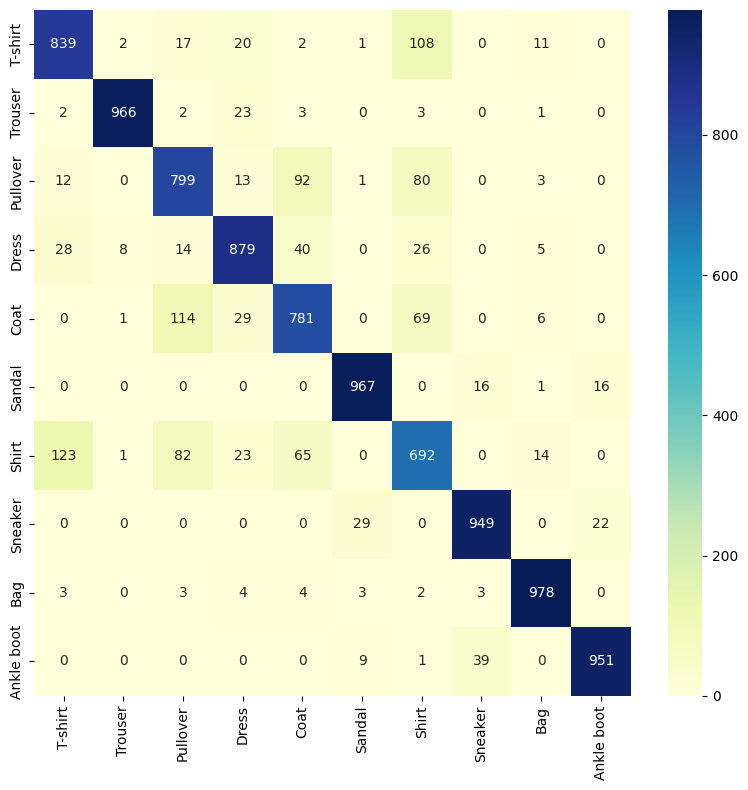

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import wandb


wandb.init(project="DA6401-Assignment_1", name="confusion_matrix")


y_test_pred_labels = np.argmax(y_test_pred, axis=0)
conf_matrix = confusion_matrix(Fnn.y_test, y_test_pred_labels)


class_labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_labels, yticklabels=class_labels)


plt.tight_layout()


plt.savefig("confusion_matrix.png")


wandb.log({
    "Confusion Matrix (Image)": wandb.Image("confusion_matrix.png"),
    "Confusion Matrix (Interactive)": wandb.plot.confusion_matrix(probs=None,
                                                                 y_true=Fnn.y_test,
                                                                 preds=y_test_pred_labels,
                                                                 class_names=class_labels)
})

# Finish wandb run
wandb.finish()


In [17]:
from keras.datasets import mnist

(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()


Fnn1 = FFNN(x_train1, y_train1, x_test1, y_test1,num_hidden_layers=4,num_neurons = 128,weight_init = 'xavier',
                act = 'relu',l2_reg = 0)
    # hyperparameter values obtained from wandb config
parameters1= Fnn1.train_model(epochs = 10,eta=1e-3,optimizer = 'adam1',  batch_size =32)
loss1,accuracy1,y_test_pred1=Fnn1.cal_test_accuracy(x_test)
print(loss1,'\t',accuracy1,'\t')

End of Epoch 1, Loss: 0.11647544602319035, Accuracy: 0.9656666666666667
End of Epoch 1, Validation Loss: 0.13852583945856184, Validation Accuracy: 0.9575
End of Epoch 2, Loss: 0.07254471807899078, Accuracy: 0.9782222222222222
End of Epoch 2, Validation Loss: 0.10080222900652748, Validation Accuracy: 0.969
End of Epoch 3, Loss: 0.054180955291145874, Accuracy: 0.983037037037037
End of Epoch 3, Validation Loss: 0.09186889890507462, Validation Accuracy: 0.9716666666666667
End of Epoch 4, Loss: 0.04204787675502149, Accuracy: 0.9868333333333333
End of Epoch 4, Validation Loss: 0.08756420229901773, Validation Accuracy: 0.9735
End of Epoch 5, Loss: 0.032962862061085875, Accuracy: 0.9893888888888889
End of Epoch 5, Validation Loss: 0.08538470329746439, Validation Accuracy: 0.9741666666666666
End of Epoch 6, Loss: 0.02513989290265591, Accuracy: 0.9919629629629629
End of Epoch 6, Validation Loss: 0.0842817735283127, Validation Accuracy: 0.9765
End of Epoch 7, Loss: 0.020995674501090477, Accuracy:

In [18]:
Fnn2 = FFNN(x_train1, y_train1, x_test1, y_test1,num_hidden_layers=3,num_neurons = 128,weight_init = 'xavier',
                act = 'relu',l2_reg = 0)
    # hyperparameter values obtained from wandb config
parameters2= Fnn2.train_model(epochs = 10,eta=1e-3,optimizer = 'nadam1',  batch_size =128)
loss2,accuracy2,y_test_pred2=Fnn2.cal_test_accuracy(x_test)
print(loss2,'\t',accuracy2,'\t')

End of Epoch 1, Loss: 0.13055834084092935, Accuracy: 0.9621481481481482
End of Epoch 1, Validation Loss: 0.13867197438340642, Validation Accuracy: 0.9596666666666667
End of Epoch 2, Loss: 0.09442881759804007, Accuracy: 0.9726851851851852
End of Epoch 2, Validation Loss: 0.11209711419016029, Validation Accuracy: 0.968
End of Epoch 3, Loss: 0.07613500229328872, Accuracy: 0.9779629629629629
End of Epoch 3, Validation Loss: 0.10018376745539881, Validation Accuracy: 0.9696666666666667
End of Epoch 4, Loss: 0.06436920298751139, Accuracy: 0.9812222222222222
End of Epoch 4, Validation Loss: 0.09348852049109503, Validation Accuracy: 0.9713333333333334
End of Epoch 5, Loss: 0.05590723872499897, Accuracy: 0.9842222222222222
End of Epoch 5, Validation Loss: 0.08911606200087734, Validation Accuracy: 0.9721666666666666
End of Epoch 6, Loss: 0.049274563995290475, Accuracy: 0.9862407407407408
End of Epoch 6, Validation Loss: 0.08607540765104658, Validation Accuracy: 0.9733333333333334
End of Epoch 7, 

In [19]:
Fnn3 = FFNN(x_train1, y_train1, x_test1, y_test1,num_hidden_layers=5,num_neurons = 128,weight_init = 'xavier',
                act = 'relu',l2_reg = 0)
    # hyperparameter values obtained from wandb config
parameters3= Fnn3.train_model(epochs = 10,eta=1e-3,optimizer = 'adam1',  batch_size =32)
loss3,accuracy3,y_test_pred3=Fnn3.cal_test_accuracy(x_test)
print(loss3,'\t',accuracy3,'\t')

End of Epoch 1, Loss: 0.10398011222793693, Accuracy: 0.968925925925926
End of Epoch 1, Validation Loss: 0.12352067542288941, Validation Accuracy: 0.9626666666666667
End of Epoch 2, Loss: 0.06834660893353155, Accuracy: 0.9789074074074074
End of Epoch 2, Validation Loss: 0.09688755252467422, Validation Accuracy: 0.9706666666666667
End of Epoch 3, Loss: 0.0490662089354864, Accuracy: 0.9850555555555556
End of Epoch 3, Validation Loss: 0.08626715419221806, Validation Accuracy: 0.9743333333333334
End of Epoch 4, Loss: 0.036678759794168965, Accuracy: 0.9886666666666667
End of Epoch 4, Validation Loss: 0.08408684729504673, Validation Accuracy: 0.9756666666666667
End of Epoch 5, Loss: 0.02871840108271461, Accuracy: 0.9912407407407408
End of Epoch 5, Validation Loss: 0.08556094111326018, Validation Accuracy: 0.9763333333333334
End of Epoch 6, Loss: 0.022064591904332676, Accuracy: 0.9929629629629629
End of Epoch 6, Validation Loss: 0.0921645360929804, Validation Accuracy: 0.9765
End of Epoch 7, L